# SUTT AI/ML Task

## Data cleaning

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Describe data

In [2]:
df = pd.read_csv("./Training Data - Recruitments 2024.csv")
df = df.drop_duplicates()
df = df.rename(columns=lambda x: x.strip())
print(len(df))
print(df.columns)
df.describe()

1099
Index(['SEX', 'AGES', 'ADMISSION MODE', 'CGPA - 1', 'CGPA-2',
       'CLUB / DEPARTMENT', 'BOARD STUDIED', 'DAYS SINCE LAST SHOWER',
       'BIRTHDAY', 'TREATS GIVEN', 'HAS A S/O ?', 'ATTENDS LECTURES',
       'CHARACTER', 'PIZZERIA EXPENDITURE (annual)', 'GRAMS / MONTH', 'GPL'],
      dtype='object')


,AGES,CGPA - 1,CGPA-2,DAYS SINCE LAST SHOWER,TREATS GIVEN,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH
count,1076.000000,1089.000000,1091.000000,1099.000000,1099.000000,1.099000e+03,1099.000000
mean,19.688662,6.465730,6.591201,5.295723,2.278435,6.251172e+04,3.523203
std,2.011757,1.734916,2.305095,3.974519,1.413827,1.338111e+06,3.586074
min,17.000000,3.000000,3.000000,0.000000,0.000000,1.060000e+02,0.150000
25%,18.000000,5.280000,5.000000,2.000000,1.000000,5.622000e+03,0.400000
50%,20.000000,6.450000,7.000000,5.000000,3.000000,1.293300e+04,1.800000
75%,21.000000,7.640000,9.000000,7.000000,4.000000,1.713650e+04,6.600000
max,26.000000,11.000000,10.000000,15.000000,4.000000,4.317099e+07,11.000000


### Remove null rows

In [3]:
# calculate number of null values in each column
dict(zip(df.columns, [len(df[df[c].isnull()]) for c in df.columns]))

{'SEX': 0,
 'AGES': 23,
 'ADMISSION MODE': 0,
 'CGPA - 1': 10,
 'CGPA-2': 8,
 'CLUB / DEPARTMENT': 1014,
 'BOARD STUDIED': 0,
 'DAYS SINCE LAST SHOWER': 0,
 'BIRTHDAY': 0,
 'TREATS GIVEN': 0,
 'HAS A S/O ?': 0,
 'ATTENDS LECTURES': 0,
 'CHARACTER': 0,
 'PIZZERIA EXPENDITURE (annual)': 0,
 'GRAMS / MONTH': 0,
 'GPL': 0}

In [4]:
# remove rows with null values in columns except " CLUB / DEPARTMENT" since that column has way too many and " AGES" since that can be inferred
df_new = df.dropna(subset=["CGPA - 1", "CGPA-2"])

# calculate number of rows removed
print(len(df) - len(df_new))

14


In [5]:
# not too many rows, let us commit this
df = df_new

In [6]:
# replace null clubs and departments with a text to represent it
df.loc[df["CLUB / DEPARTMENT"].isnull(), "CLUB / DEPARTMENT"] = "No club"

### Fixing categorical data

In [7]:
# check categorical data
print(df["CLUB / DEPARTMENT"].unique())
print(df["HAS A S/O ?"].unique())
print(df["ADMISSION MODE"].unique())
print(df["ATTENDS LECTURES"].unique())
print(df["BOARD STUDIED"].unique())
print(df["CHARACTER"].unique())
print(df["GPL"].unique())
print(df["SEX"].unique())

['No club' 'Mountaineering' 'Gaming Club' 'SuTT' 'Mountaneering' 'DVm'
 'DVM' 'SUTT' 'Gaing Clu' 'Mtaineering' 'SUTt' 'Mountainring' 'Gaming'
 'dv' 'moneering' 'VM' 'Mou' 'Gamub']
['YES' 'NO' 'FALSE']
['BITSAT' 'DASA' 'BOARD TOPPER']
['NO' 'YES']
['CBSE' 'ICSE' 'Other' 'Invalid']
['LITE' 'GHOT']
['NO' 'YES']
['male' 'female']


In [8]:
# fix club/dept names
mountaineering_club_aliases = ["Mountaineering", "Mountaneering", "Mtaineering", "Mountainring", "moneering", "Mou"]
gaming_club_aliases = ["Gaming Club", "Gaing Clu", "Gaming", "Gamub"]
sutt_aliases = ["SUTT", "SuTT", "SUTt"]
dvm_aliases = ["DVM", "DVm", "dv", "VM"]

df.loc[df["CLUB / DEPARTMENT"].isin(mountaineering_club_aliases), "CLUB / DEPARTMENT"] = mountaineering_club_aliases[0]
df.loc[df["CLUB / DEPARTMENT"].isin(gaming_club_aliases), "CLUB / DEPARTMENT"] = gaming_club_aliases[0]
df.loc[df["CLUB / DEPARTMENT"].isin(sutt_aliases), "CLUB / DEPARTMENT"] = sutt_aliases[0]
df.loc[df["CLUB / DEPARTMENT"].isin(dvm_aliases), "CLUB / DEPARTMENT"] = dvm_aliases[0]

# fix other categorical data
df.loc[df["HAS A S/O ?"].isin(["FALSE"]), "HAS A S/O ?"] = "NO"
df.loc[df["BOARD STUDIED"].isin(["Invalid"]), "BOARD STUDIED"] = "Other"

### Checking ranges

In [9]:
df["CGPA - 1"].describe()

count    1085.000000
mean        6.465788
std         1.730754
min         3.000000
25%         5.280000
50%         6.450000
75%         7.640000
max        11.000000
Name: CGPA - 1, dtype: float64

In [10]:
df["CGPA-2"].describe()

count    1085.000000
mean        6.593548
std         2.302685
min         3.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: CGPA-2, dtype: float64

In [11]:
# limit to 10
df["CGPA - 1"] = df["CGPA - 1"].clip(upper=10.0)
df["CGPA-2"] = df["CGPA-2"].clip(upper=10.0)

In [12]:
# age + birth year should equal 2024
df["AGES"] = [2024 - int(i.split("/")[-1]) for i in df["BIRTHDAY"]]

# now drop birthday column
df = df.drop(["BIRTHDAY"], axis=1)

# save preprocessed data to save time later
df.to_csv("./cleaned.csv", index=False)

## Data Analysis

### Import libraries (if not already imported)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load cleaned data (skip if above cells have been run)

In [14]:
df = pd.read_csv("./cleaned.csv")

### Plot relations with gender

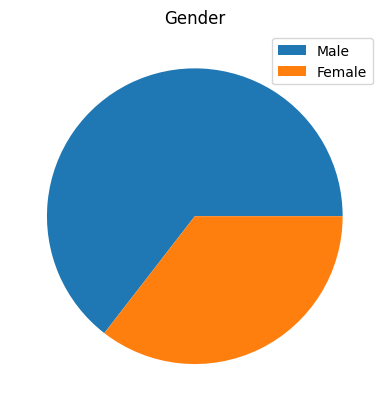

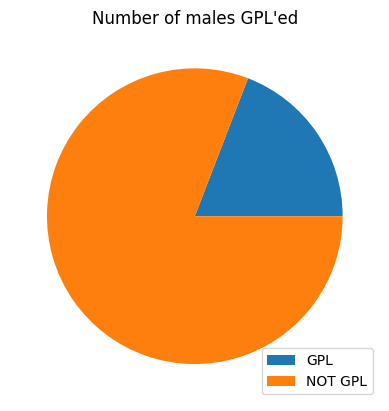

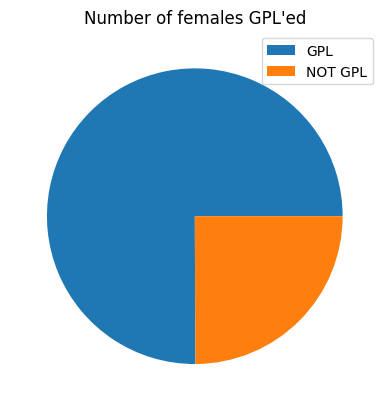

In [15]:
# Plot pie charts to visualise the percentages of people GPL'ed based on gender 

number_of_people_with_so_gpled = len(df[(df["SEX"] == "male") & (df["GPL"] == "YES")])
number_of_people_with_so_not_gpled = len(df[(df["SEX"] == "male") & (df["GPL"] == "NO")])
number_of_people_without_so_gpled = len(df[(df["SEX"] == "female") & (df["GPL"] == "YES")])
number_of_people_without_so_not_gpled = len(df[(df["SEX"] == "female") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_people_with_so_gpled + number_of_people_with_so_not_gpled, number_of_people_without_so_gpled + number_of_people_without_so_not_gpled]))
plt.legend(np.array(["Male", "Female"]))
plt.title("Gender")
plt.show()

plt.pie(np.array([number_of_people_with_so_gpled, number_of_people_with_so_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of males GPL'ed")
plt.show()

plt.pie(np.array([number_of_people_without_so_gpled, number_of_people_without_so_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of females GPL'ed")
plt.show()

Inference: Sex has an important role in determining GPL, thus we shall definitely include it in the final feature set

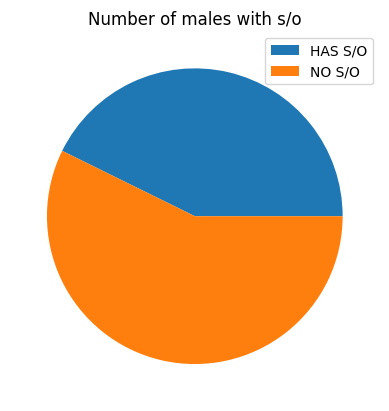

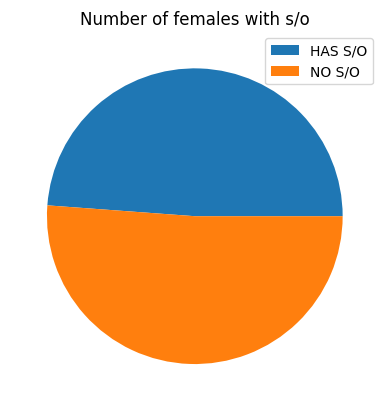

In [16]:
# Plot pie charts to visualise the percentages of people having S/O based on gender 

number_of_males_with_so = len(df[(df["SEX"] == "male") & (df["HAS A S/O ?"] == "YES")])
number_of_males_without_so = len(df[(df["SEX"] == "male") & (df["HAS A S/O ?"] == "NO")])
number_of_females_with_so = len(df[(df["SEX"] == "female") & (df["HAS A S/O ?"] == "YES")])
number_of_females_without_so = len(df[(df["SEX"] == "female") & (df["HAS A S/O ?"] == "NO")])

plt.pie(np.array([number_of_males_with_so, number_of_males_without_so]))
plt.legend(np.array(["HAS S/O", "NO S/O"]))
plt.title("Number of males with s/o")
plt.show()

plt.pie(np.array([number_of_females_with_so, number_of_females_without_so]))
plt.legend(np.array(["HAS S/O", "NO S/O"]))
plt.title("Number of females with s/o")
plt.show()

Inference: Sex is not a great indicator of S/O, we must further test S/O to see if it is a useful feature

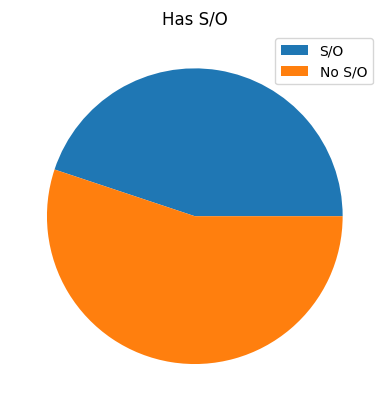

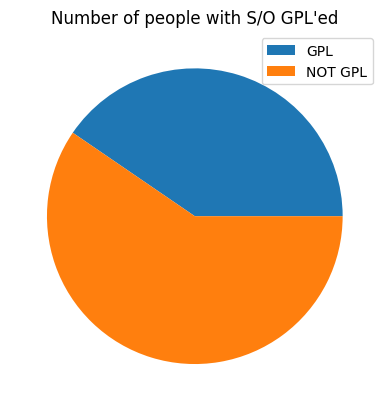

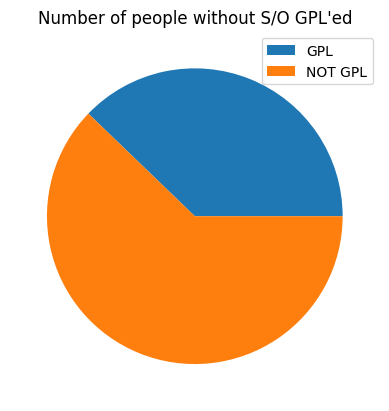

In [17]:
number_of_people_with_so_gpled = len(df[(df["HAS A S/O ?"] == "YES") & (df["GPL"] == "YES")])
number_of_people_with_so_not_gpled = len(df[(df["HAS A S/O ?"] == "YES") & (df["GPL"] == "NO")])
number_of_people_without_so_gpled = len(df[(df["HAS A S/O ?"] == "NO") & (df["GPL"] == "YES")])
number_of_people_without_so_not_gpled = len(df[(df["HAS A S/O ?"] == "NO") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_people_with_so_gpled + number_of_people_with_so_not_gpled, number_of_people_without_so_gpled + number_of_people_without_so_not_gpled]))
plt.legend(np.array(["S/O", "No S/O"]))
plt.title("Has S/O")
plt.show()

plt.pie(np.array([number_of_people_with_so_gpled, number_of_people_with_so_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of people with S/O GPL'ed")
plt.show()

plt.pie(np.array([number_of_people_without_so_gpled, number_of_people_without_so_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of people without S/O GPL'ed")
plt.show()

Inference: Not a great feature, let us remove from feature set

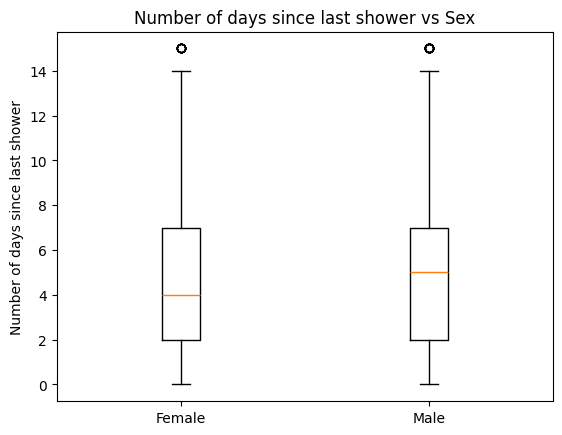

In [18]:
plt.boxplot([np.array(df[df["SEX"] == "female"]["DAYS SINCE LAST SHOWER"]), np.array(df[df["SEX"] == "male"]["DAYS SINCE LAST SHOWER"])], labels=["Female", "Male"])
plt.title("Number of days since last shower vs Sex")
plt.ylabel("Number of days since last shower")
plt.show()

Inferencer: Not a significant correlation, hence we must test this feature further

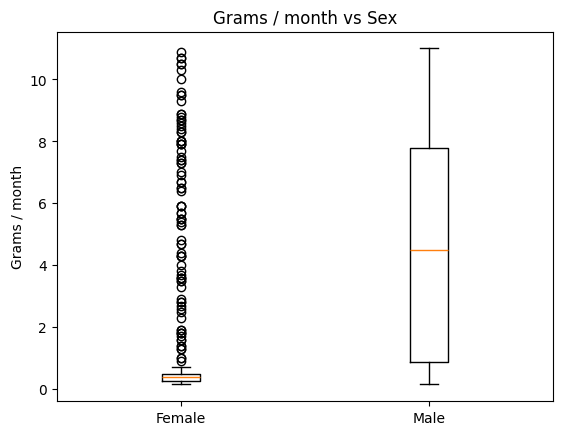

In [19]:
plt.boxplot([np.array(df[df["SEX"] == "female"]["GRAMS / MONTH"]), np.array(df[df["SEX"] == "male"]["GRAMS / MONTH"])], labels=["Female", "Male"])
plt.title("Grams / month vs Sex")
plt.ylabel("Grams / month")
plt.show()

Inference: Female sex can almost completely determine this feature, while male has variance. Thus, we must test this feature further

### CGPA

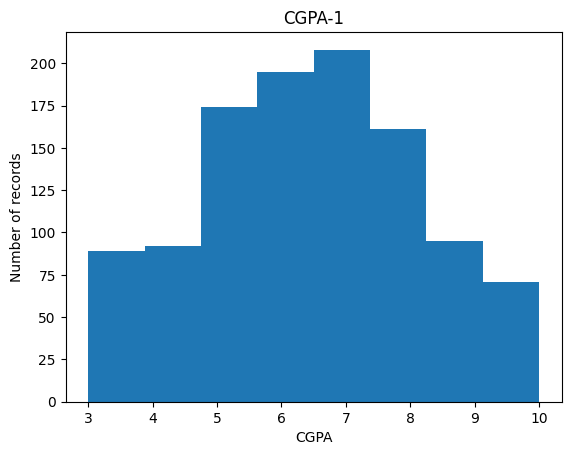

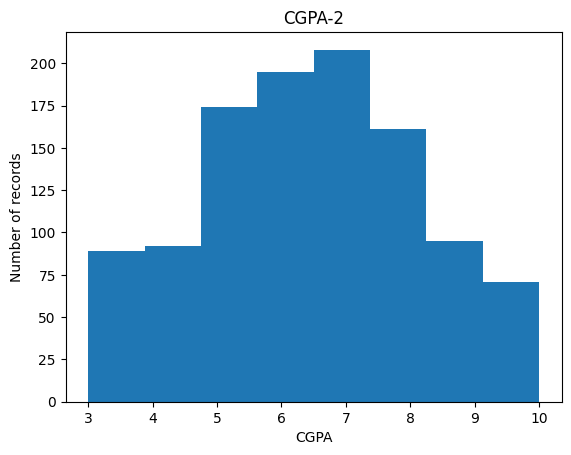

In [20]:
plt.hist(df["CGPA - 1"], bins=int(df["CGPA - 1"].max() - df["CGPA - 1"].min() + 1))
plt.title("CGPA-1")
plt.xlabel("CGPA")
plt.ylabel("Number of records")
plt.show()

plt.hist(df["CGPA - 1"], bins=int(df["CGPA-2"].max() - df["CGPA-2"].min() + 1))
plt.title("CGPA-2")
plt.xlabel("CGPA")
plt.ylabel("Number of records")
plt.show()

Distributions of CGPAs are approximately normal. Next, let us study the relation between the two CGPAs and GPL simultaneously

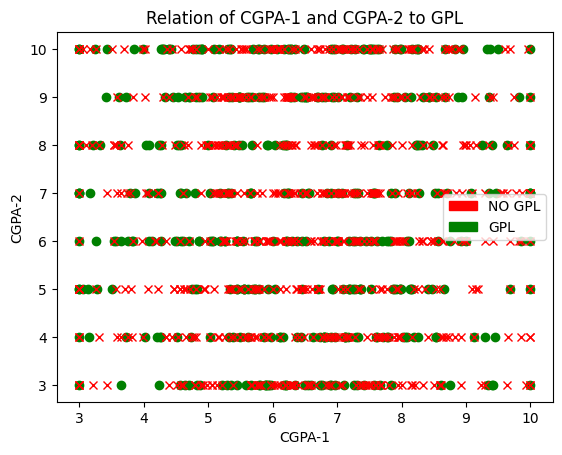

In [21]:
import matplotlib.patches as mpatches

plt.plot(df[df["GPL"] == "YES"]["CGPA - 1"], df[df["GPL"] == "YES"]["CGPA-2"], "og")
plt.plot(df[df["GPL"] == "NO"]["CGPA - 1"], df[df["GPL"] == "NO"]["CGPA-2"], "xr")
plt.title("Relation of CGPA-1 and CGPA-2 to GPL")
plt.xlabel("CGPA-1")
plt.ylabel("CGPA-2")

red_patch = mpatches.Patch(color='red', label='NO GPL')
greeen_patch = mpatches.Patch(color='green', label='GPL')
plt.legend(handles=[red_patch, greeen_patch])
plt.show()

Observation 1: CGPA - 1 seems to have no effect on CGPA-2
Observation 2: There seems to be no correlation between CGPA and GPL

### Studying relations between categorical data and GPL

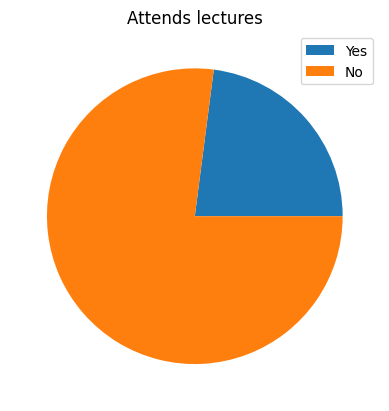

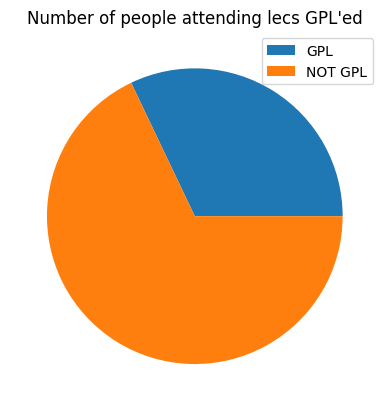

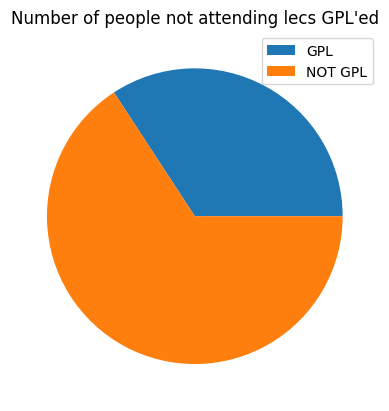

In [22]:
number_of_people_attending_lectures_gpled = len(df[(df["ATTENDS LECTURES"] == "YES") & (df["GPL"] == "YES")])
number_of_people_attending_lectures_not_gpled = len(df[(df["ATTENDS LECTURES"] == "YES") & (df["GPL"] == "NO")])
number_of_people_not_attending_lectures_gpled = len(df[(df["ATTENDS LECTURES"] == "NO") & (df["GPL"] == "YES")])
number_of_people_not_attending_lectures_not_gpled = len(df[(df["ATTENDS LECTURES"] == "NO") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_people_attending_lectures_gpled + number_of_people_attending_lectures_not_gpled, number_of_people_not_attending_lectures_gpled + number_of_people_not_attending_lectures_not_gpled]))
plt.legend(np.array(["Yes", "No"]))
plt.title("Attends lectures")
plt.show()

plt.pie(np.array([number_of_people_attending_lectures_gpled, number_of_people_with_so_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of people attending lecs GPL'ed")
plt.show()

plt.pie(np.array([number_of_people_not_attending_lectures_gpled, number_of_people_not_attending_lectures_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of people not attending lecs GPL'ed")
plt.show()

Attending lecs doesn't seem to have an effect on GPL

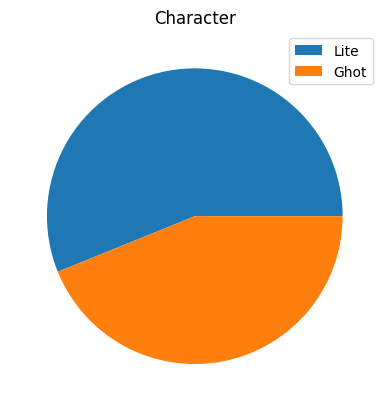

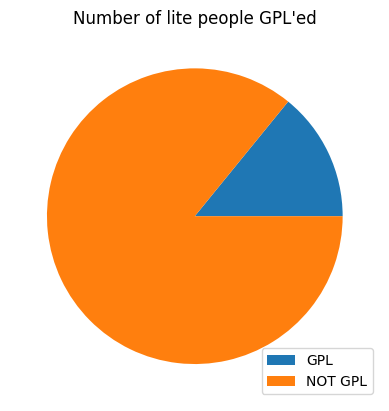

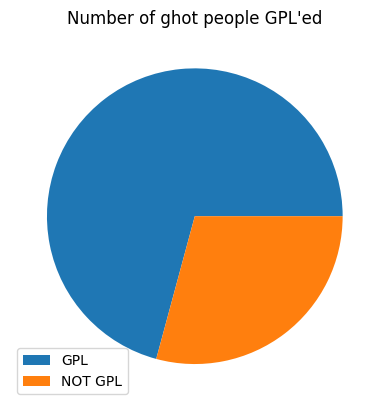

In [23]:
number_of_lites_gpled = len(df[(df["CHARACTER"] == "LITE") & (df["GPL"] == "YES")])
number_of_lites_not_gpled = len(df[(df["CHARACTER"] == "LITE") & (df["GPL"] == "NO")])
number_of_ghots_gpled = len(df[(df["CHARACTER"] == "GHOT") & (df["GPL"] == "YES")])
number_of_ghots_not_gpled = len(df[(df["CHARACTER"] == "GHOT") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_lites_gpled + number_of_lites_not_gpled, number_of_ghots_gpled + number_of_ghots_not_gpled]))
plt.legend(np.array(["Lite", "Ghot"]))
plt.title("Character")
plt.show()

plt.pie(np.array([number_of_lites_gpled, number_of_lites_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of lite people GPL'ed")
plt.show()

plt.pie(np.array([number_of_ghots_gpled, number_of_ghots_not_gpled]))
plt.legend(np.array(["GPL", "NOT GPL"]))
plt.title("Number of ghot people GPL'ed")
plt.show()

More ghots tend to get GPL'ed

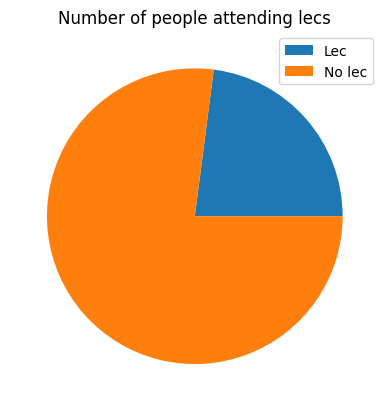

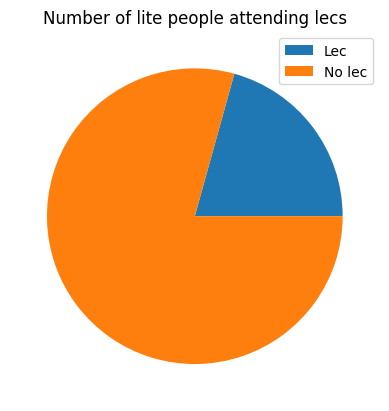

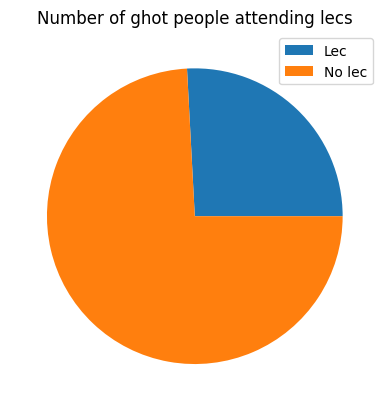

In [24]:
number_of_lites_attending_lecs = len(df[(df["CHARACTER"] == "LITE") & (df["ATTENDS LECTURES"] == "YES")])
number_of_lites_not_attending_lecs = len(df[(df["CHARACTER"] == "LITE") & (df["ATTENDS LECTURES"] == "NO")])
number_of_ghots_attending_lecs = len(df[(df["CHARACTER"] == "GHOT") & (df["ATTENDS LECTURES"] == "YES")])
number_of_ghots_not_attending_lecs = len(df[(df["CHARACTER"] == "GHOT") & (df["ATTENDS LECTURES"] == "NO")])

plt.pie(np.array([number_of_lites_attending_lecs + number_of_ghots_attending_lecs, number_of_lites_not_attending_lecs + number_of_ghots_not_attending_lecs]))
plt.legend(np.array(["Lec", "No lec"]))
plt.title("Number of people attending lecs")
plt.show()

plt.pie(np.array([number_of_lites_attending_lecs, number_of_lites_not_attending_lecs]))
plt.legend(np.array(["Lec", "No lec"]))
plt.title("Number of lite people attending lecs")
plt.show()

plt.pie(np.array([number_of_ghots_attending_lecs, number_of_ghots_not_attending_lecs]))
plt.legend(np.array(["Lec", "No lec"]))
plt.title("Number of ghot people attending lecs")
plt.show()

Not much relation between character and attending lecs, we don't get much information from character.

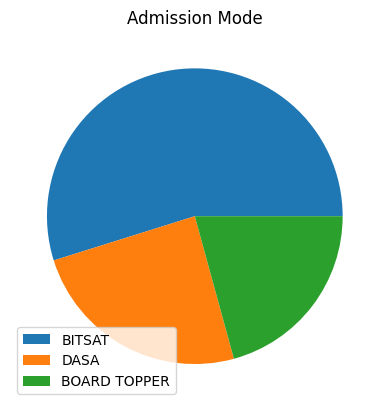

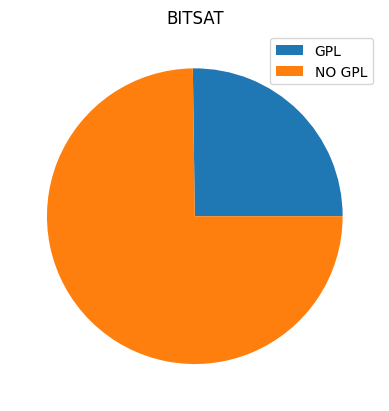

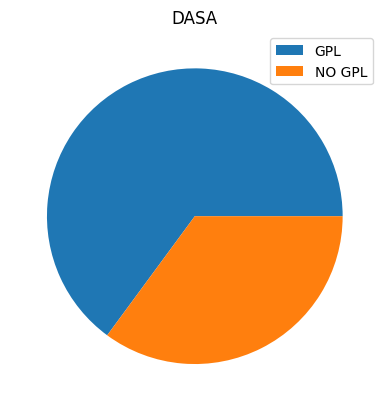

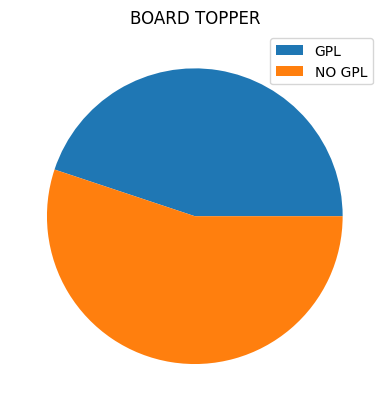

In [25]:
number_of_bitsat_gpled = len(df[(df["ADMISSION MODE"] == "BITSAT") & (df["GPL"] == "YES")])
number_of_dasa_gpled = len(df[(df["ADMISSION MODE"] == "DASA") & (df["GPL"] == "YES")])
number_of_board_toppers_gpled = len(df[(df["ADMISSION MODE"] == "BOARD TOPPER") & (df["GPL"] == "YES")])
number_of_bitsat_not_gpled = len(df[(df["ADMISSION MODE"] == "BITSAT") & (df["GPL"] == "NO")])
number_of_dasa_not_gpled = len(df[(df["ADMISSION MODE"] == "DASA") & (df["GPL"] == "NO")])
number_of_board_toppers_not_gpled = len(df[(df["ADMISSION MODE"] == "BOARD TOPPER") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_bitsat_gpled + number_of_bitsat_not_gpled, number_of_dasa_gpled + number_of_dasa_not_gpled, number_of_board_toppers_gpled + number_of_board_toppers_not_gpled]))
plt.legend(np.array(["BITSAT", "DASA", "BOARD TOPPER"]))
plt.title("Admission Mode")
plt.show()

plt.pie(np.array([number_of_bitsat_gpled, number_of_bitsat_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("BITSAT")
plt.show()

plt.pie(np.array([number_of_dasa_gpled, number_of_dasa_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("DASA")
plt.show()

plt.pie(np.array([number_of_board_toppers_gpled, number_of_board_toppers_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("BOARD TOPPER")
plt.show()

Admission mode has a good effect on GPL

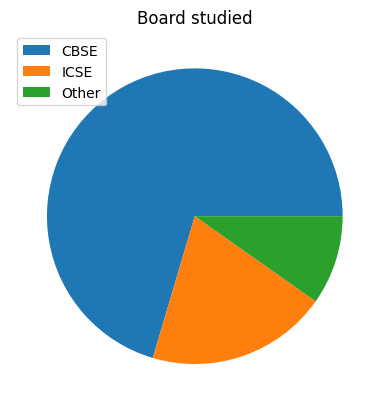

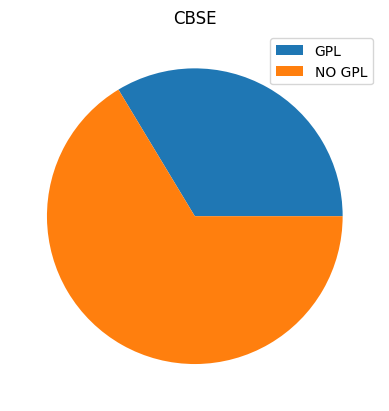

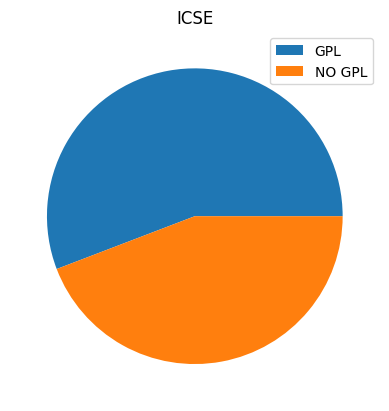

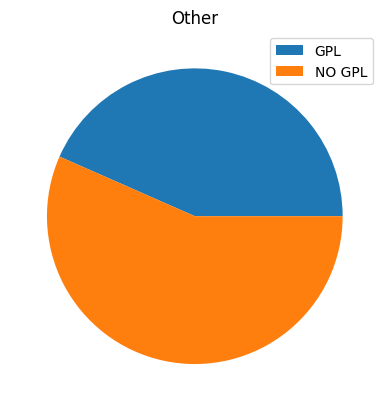

In [26]:
number_of_cbse_gpled = len(df[(df["BOARD STUDIED"] == "CBSE") & (df["GPL"] == "YES")])
number_of_icse_gpled = len(df[(df["BOARD STUDIED"] == "ICSE") & (df["GPL"] == "YES")])
number_of_other_gpled = len(df[(df["BOARD STUDIED"] == "Other") & (df["GPL"] == "YES")])
number_of_cbse_not_gpled = len(df[(df["BOARD STUDIED"] == "CBSE") & (df["GPL"] == "NO")])
number_of_icse_not_gpled = len(df[(df["BOARD STUDIED"] == "ICSE") & (df["GPL"] == "NO")])
number_of_other_not_gpled = len(df[(df["BOARD STUDIED"] == "Other") & (df["GPL"] == "NO")])

plt.pie(np.array([number_of_cbse_gpled + number_of_cbse_not_gpled, number_of_icse_gpled + number_of_icse_not_gpled, number_of_other_gpled + number_of_other_not_gpled]))
plt.legend(np.array(["CBSE", "ICSE", "Other"]))
plt.title("Board studied")
plt.show()

plt.pie(np.array([number_of_cbse_gpled, number_of_cbse_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("CBSE")
plt.show()

plt.pie(np.array([number_of_icse_gpled, number_of_icse_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("ICSE")
plt.show()

plt.pie(np.array([number_of_other_gpled, number_of_other_not_gpled]))
plt.legend(np.array(["GPL", "NO GPL"]))
plt.title("Other")
plt.show()

### Numerical data vs GPL

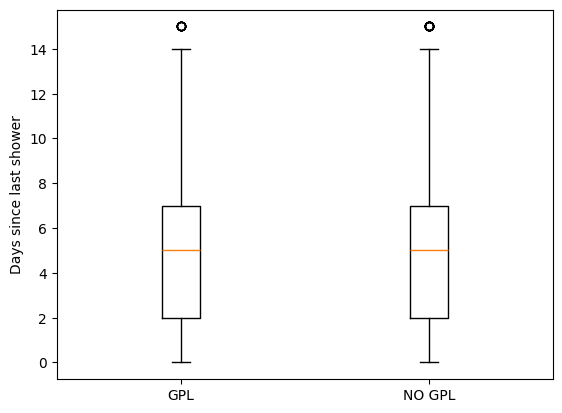

In [27]:
plt.boxplot([np.array(df[df["GPL"] == "YES"]["DAYS SINCE LAST SHOWER"]), np.array(df[df["GPL"] == "NO"]["DAYS SINCE LAST SHOWER"])], labels=["GPL", "NO GPL"])
plt.ylabel("Days since last shower")
plt.show()

No effect, remove

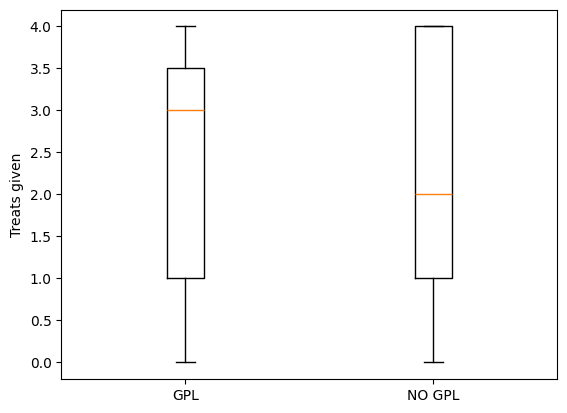

In [28]:
plt.boxplot([np.array(df[df["GPL"] == "YES"]["TREATS GIVEN"]), np.array(df[df["GPL"] == "NO"]["TREATS GIVEN"])], labels=["GPL", "NO GPL"])
plt.ylabel("Treats given")
plt.show()

No difference in treats given by gpl'ed and non gpl'ed people

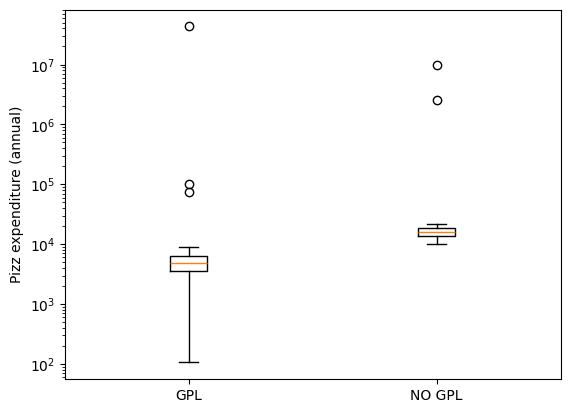

In [29]:
plt.boxplot([np.array(df[df["GPL"] == "YES"]["PIZZERIA EXPENDITURE (annual)"]), np.array(df[df["GPL"] == "NO"]["PIZZERIA EXPENDITURE (annual)"])], labels=["GPL", "NO GPL"])
plt.ylabel("Pizz expenditure (annual)")
plt.yscale("log")
plt.show()

People who were not GPL'ed tend to spend more than GPL'ed

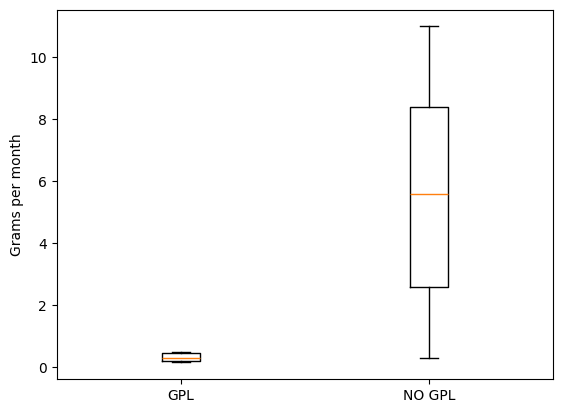

In [30]:
plt.boxplot([np.array(df[df["GPL"] == "YES"]["GRAMS / MONTH"]), np.array(df[df["GPL"] == "NO"]["GRAMS / MONTH"])], labels=["GPL", "NO GPL"])
plt.ylabel("Grams per month")
plt.show()

Strong correlation!

### Final feature set

In [31]:
# S/O, attends lecs, days since last shower removed
df = df[['SEX', 'AGES', 'ADMISSION MODE', 'CGPA - 1', 'CGPA-2', 'CLUB / DEPARTMENT', 'BOARD STUDIED', 'TREATS GIVEN', 'CHARACTER', 'PIZZERIA EXPENDITURE (annual)', 'GRAMS / MONTH', 'GPL']]

In [32]:
# normalise numeric data and ordinal encode categorical data
for c in df.columns:
    if df[c].dtype.name == "object":
        df[c] = df[c].replace(dict(zip(df[c].unique(), range(len(df[c].unique())))))
    else:
        df[c] = df[c] / df[c].max()

/tmp/ipykernel_30228/3933910613.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace(dict(zip(df[c].unique(), range(len(df[c].unique())))))


In [33]:
df.to_csv("cleaned_filtered.csv", index=False)

### Final preprocessing pipeline

In [34]:
def preprocess(df, has_label=True):
    df = df.drop_duplicates()
    df = df.rename(columns=lambda x: x.strip())
    df = df.dropna(subset=["CGPA - 1", "CGPA-2"])
    df.loc[df["CLUB / DEPARTMENT"].isnull(), "CLUB / DEPARTMENT"] = "No club"
    mountaineering_club_aliases = ["Mountaineering", "Mountaneering", "Mtaineering", "Mountainring", "moneering", "Mou"]
    gaming_club_aliases = ["Gaming Club", "Gaing Clu", "Gaming", "Gamub"]
    sutt_aliases = ["SUTT", "SuTT", "SUTt"]
    dvm_aliases = ["DVM", "DVm", "dv", "VM"]
    df.loc[df["CLUB / DEPARTMENT"].isin(mountaineering_club_aliases), "CLUB / DEPARTMENT"] = mountaineering_club_aliases[0]
    df.loc[df["CLUB / DEPARTMENT"].isin(gaming_club_aliases), "CLUB / DEPARTMENT"] = gaming_club_aliases[0]
    df.loc[df["CLUB / DEPARTMENT"].isin(sutt_aliases), "CLUB / DEPARTMENT"] = sutt_aliases[0]
    df.loc[df["CLUB / DEPARTMENT"].isin(dvm_aliases), "CLUB / DEPARTMENT"] = dvm_aliases[0]
    df.loc[df["HAS A S/O ?"].isin(["FALSE"]), "HAS A S/O ?"] = "NO"
    df.loc[df["BOARD STUDIED"].isin(["Invalid"]), "BOARD STUDIED"] = "Other"
    df["CGPA - 1"] = df['CGPA - 1'].clip(upper=10.0)
    df["CGPA-2"] = df['CGPA-2'].clip(upper=10.0)
    df["AGES"] = [2024 - int(i.split("/")[-1]) for i in df["BIRTHDAY"]]
    df = df.drop(["BIRTHDAY"], axis=1)
    to_include_features = ['SEX', 'AGES', 'ADMISSION MODE', 'CGPA - 1', 'CGPA-2', 'CLUB / DEPARTMENT', 'BOARD STUDIED', 'TREATS GIVEN', 'CHARACTER', 'PIZZERIA EXPENDITURE (annual)', 'GRAMS / MONTH']

    if has_label:
        to_include_features.append("GPL")

    df = df[to_include_features]
    
    for c in df.columns:
        if df[c].dtype.name == "object":
            df[c] = df[c].replace(dict(zip(df[c].unique(), range(len(df[c].unique())))))
        else:
            df[c] = df[c] / df[c].max()
    
    return df

## Model Creation and Training

### Load preprocessed data (skip if above cells ran)

In [35]:
import pandas as pd
train_val_df = pd.read_csv("./cleaned_filtered.csv") # uncomment if preprocessing not run

### Importing libraries

In [36]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.tensorboard import SummaryWriter

from sklearn.model_selection import train_test_split

### Train test split

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(train_val_df.loc[:, train_val_df.columns != "GPL"], train_val_df["GPL"], random_state=42, test_size=0.2)
X_train, X_valid, y_train, y_valid = torch.tensor(X_train.values).to(torch.float32), torch.tensor(X_valid.values).to(torch.float32), torch.tensor(y_train.values).to(torch.float32), torch.tensor(y_valid.values).to(torch.float32)
train_val_df.loc[:, train_val_df.columns != "GPL"]

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,TREATS GIVEN,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH
0,0,0.730769,0,0.885,0.7,0,0,1.00,0,0.000475,0.454545
1,1,0.807692,1,0.701,0.9,0,1,0.25,1,0.000055,0.018182
2,1,0.769231,0,0.300,0.8,0,0,1.00,1,0.000198,0.027273
3,0,0.807692,0,0.565,0.9,0,0,0.75,0,0.000319,0.772727
4,0,0.653846,0,0.351,1.0,0,2,0.50,0,0.000313,0.054545
...,...,...,...,...,...,...,...,...,...,...,...
1080,0,0.730769,2,0.602,0.3,0,0,0.00,1,0.000305,0.354545
1081,1,0.923077,2,0.357,0.6,0,0,0.50,1,0.000130,0.027273
1082,1,0.807692,0,0.371,0.5,2,0,1.00,0,0.000407,0.490909
1083,0,0.846154,1,0.968,0.5,0,0,0.75,1,0.000380,0.790909


### Build and train the classifier

In [38]:
class GPLClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(in_features=len(df.columns) - 1, out_features=10)
        self.hidden_layer = nn.Linear(in_features=10, out_features=10)
        self.output_layer = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
        return F.sigmoid(self.output_layer(F.relu(self.hidden_layer(F.relu(self.input_layer(X))))))
    
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [39]:
writer = SummaryWriter("runs/GPL")
torch.manual_seed(42)

model = GPLClassifier()
loss_fn = nn.BCEWithLogitsLoss()
optimiser = Adam(model.parameters(), lr=0.001, eps=1e-5)
epochs = 15000

for epoch in range(epochs):
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(y_logits)

    train_loss = loss_fn(y_logits, y_train)
    valid_loss = loss_fn(torch.round(model(X_valid).squeeze()), y_valid)
    train_acc = accuracy_fn(y_train, y_pred)
    valid_acc = accuracy_fn(y_valid, torch.round(model(X_valid).squeeze()))

    writer.add_scalars("Training vs Validation loss", { 'Training': train_loss, 'Validation': valid_loss }, epoch)
    writer.add_scalars("Training vs Validation acc", { 'Training': train_acc, 'Validation': valid_acc }, epoch)

    optimiser.zero_grad()
    train_loss.backward()
    optimiser.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss}")

writer.flush()

Epoch: 0 | Train Loss: 0.8028184771537781
Epoch: 100 | Train Loss: 0.7481803894042969
Epoch: 200 | Train Loss: 0.6503961682319641
Epoch: 300 | Train Loss: 0.6116953492164612
Epoch: 400 | Train Loss: 0.6017320156097412
Epoch: 500 | Train Loss: 0.5956275463104248
Epoch: 600 | Train Loss: 0.5908329486846924
Epoch: 700 | Train Loss: 0.5871239304542542
Epoch: 800 | Train Loss: 0.5842458009719849
Epoch: 900 | Train Loss: 0.5821148753166199
Epoch: 1000 | Train Loss: 0.5805186033248901
Epoch: 1100 | Train Loss: 0.5791082382202148
Epoch: 1200 | Train Loss: 0.5772983431816101
Epoch: 1300 | Train Loss: 0.5761716365814209
Epoch: 1400 | Train Loss: 0.5753766894340515
Epoch: 1500 | Train Loss: 0.5747292637825012
Epoch: 1600 | Train Loss: 0.5741527080535889
Epoch: 1700 | Train Loss: 0.5736103057861328
Epoch: 1800 | Train Loss: 0.5730576515197754
Epoch: 1900 | Train Loss: 0.5724068284034729
Epoch: 2000 | Train Loss: 0.5714942216873169
Epoch: 2100 | Train Loss: 0.570688009262085
Epoch: 2200 | Train Los

### Evaluate the final model

In [40]:
def conf_matrix(y_true, y_pred):
    true_pos = 0
    false_pos = 0
    false_neg = 0
    true_neg = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_pos+=1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_pos+=1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_neg+=1
        else:
            true_neg+=1

    return torch.tensor([[true_pos, false_pos], [false_neg, true_neg]])

In [41]:
print(accuracy_fn(y_valid, torch.round(model(X_valid).squeeze())))
conf_matrix(y_valid, torch.round(model(X_valid).squeeze()))

94.47004608294931


tensor([[ 98,   9],
        [  3, 107]])

### Save the final model

In [42]:
torch.save(model, "./model")

## Model inference

### Load model (skip if above cells have been run)

In [43]:
model = torch.load("./model")

### Test data

In [46]:
og_df = pd.read_csv("./Test Data - Recruitments 2024.csv")
df = preprocess(og_df, has_label=False)
X = torch.tensor(df.values).to(torch.float32)
y_pred = torch.round(model(X).squeeze())
og_df = og_df.assign(GPL=["YES" if i == 1 else "NO" for i in y_pred.detach().numpy()])
og_df.to_csv("Test predictions.csv", index=False)

/tmp/ipykernel_30228/1718070771.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace(dict(zip(df[c].unique(), range(len(df[c].unique())))))


### Seniors data

In [45]:
senior_df = pd.read_csv("./SUTT Seniors Test - Recruitments 2024 - SUTT Excomm.csv")
names_column = senior_df['NAME'].values
df = preprocess(senior_df[[c for c in senior_df.columns if c != 'NAME']], has_label=False)
X = torch.tensor(df.values).to(torch.float32)
y_pred = torch.round(model(X).squeeze())
senior_df = senior_df.assign(GPL=["YES" if i == 1 else "NO" for i in y_pred.detach().numpy()])
senior_df.to_csv("Senior test predictions.csv", index=False)

/tmp/ipykernel_30228/1718070771.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].replace(dict(zip(df[c].unique(), range(len(df[c].unique())))))
